# 1-1 [Movielens full dataset EDA](https://grouplens.org/datasets/movielens/)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
movies_raw = pd.read_csv('./data/movies_big.csv', dtype={'movieId': 'int32', 'title': 'str'})
ratings_raw = pd.read_csv('./data/ratings_big.csv', dtype={'userId': 'int32', 'movieId': 'int32', 'rating':'float32', 'timestamp': 'int32'})
ratings_raw.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [90]:
ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 423.5 MB


In [91]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.1+ MB


## b)

In [92]:
ratings_raw['movieId'].value_counts()[:10]

318     97999
356     97040
296     92406
593     87899
2571    84545
260     81815
480     76451
527     71516
110     68803
1       68469
Name: movieId, dtype: int64

In [93]:
movies_raw.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [94]:
movieId_with_most_ratings_series = ratings_raw['movieId'].value_counts().rename('number_of_ratings').astype('int32')
movieId_with_most_ratings_series

318       97999
356       97040
296       92406
593       87899
2571      84545
          ...  
165077        1
172453        1
192975        1
167092        1
142855        1
Name: number_of_ratings, Length: 53889, dtype: int32

In [95]:
movies_with_most_ratings = movies_raw.query(f"movieId == {list(movieId_with_most_ratings_series.index)}").set_index(
    "movieId"
).join(movieId_with_most_ratings_series).sort_values(
    "number_of_ratings", ascending=False
).reset_index()

movies_with_most_ratings.head(10)

,movieId,title,genres,number_of_ratings
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,97999
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,81815
6,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,76451
7,527,Schindler's List (1993),Drama|War,71516
8,110,Braveheart (1995),Action|Drama|War,68803
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469


In [96]:
movies_with_most_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53889 entries, 0 to 53888
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movieId            53889 non-null  int64 
 1   title              53889 non-null  object
 2   genres             53889 non-null  object
 3   number_of_ratings  53889 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.4+ MB


## c)

In [97]:
ratings_raw.query(f'movieId == {list(movieId_with_most_ratings_series[:10].index)}')['rating'].mean()

4.1022882

## d)

In [98]:
import re
def return_year(title):
    try:
        return re.findall("(\d{4})", title)[0]
    except:
        return None

movies_with_year = movies_raw.join(
    movies_raw["title"]
    .apply(lambda title: return_year(title))
    .rename("year")
    .dropna()
    .astype('int16')
).query('year > 1800 & year < 2022')

In [151]:
movies_raw["title"].apply(lambda title: return_year(title)).rename(
    "year"
).dropna().astype("int16").info()

<class 'pandas.core.series.Series'>
Int64Index: 57775 entries, 0 to 58097
Series name: year
Non-Null Count  Dtype
--------------  -----
57775 non-null  int16
dtypes: int16(1)
memory usage: 564.2 KB


In [99]:
movies_with_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57687 entries, 0 to 58097
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  57687 non-null  int32  
 1   title    57687 non-null  object 
 2   genres   57687 non-null  object 
 3   year     57687 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 2.0+ MB


In [112]:
movies_with_year

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946.0
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011.0
58095,193880,Her Name Was Mumu (2016),Drama,2016.0
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017.0


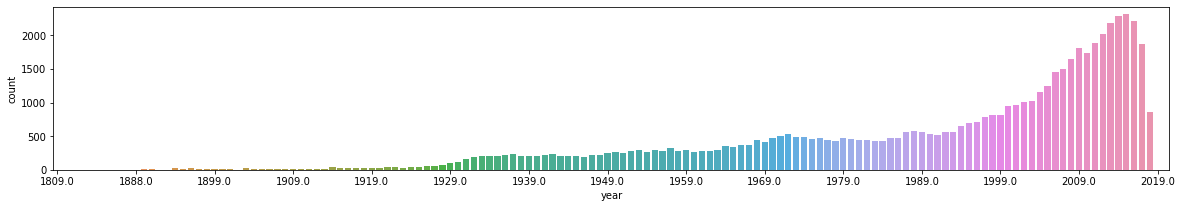

In [100]:
import matplotlib.ticker as ticker
plt.figure(figsize=[20, 3])
ax = sns.countplot(x='year', data=movies_with_year)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

## e)

<AxesSubplot:xlabel='number_of_ratings', ylabel='title'>

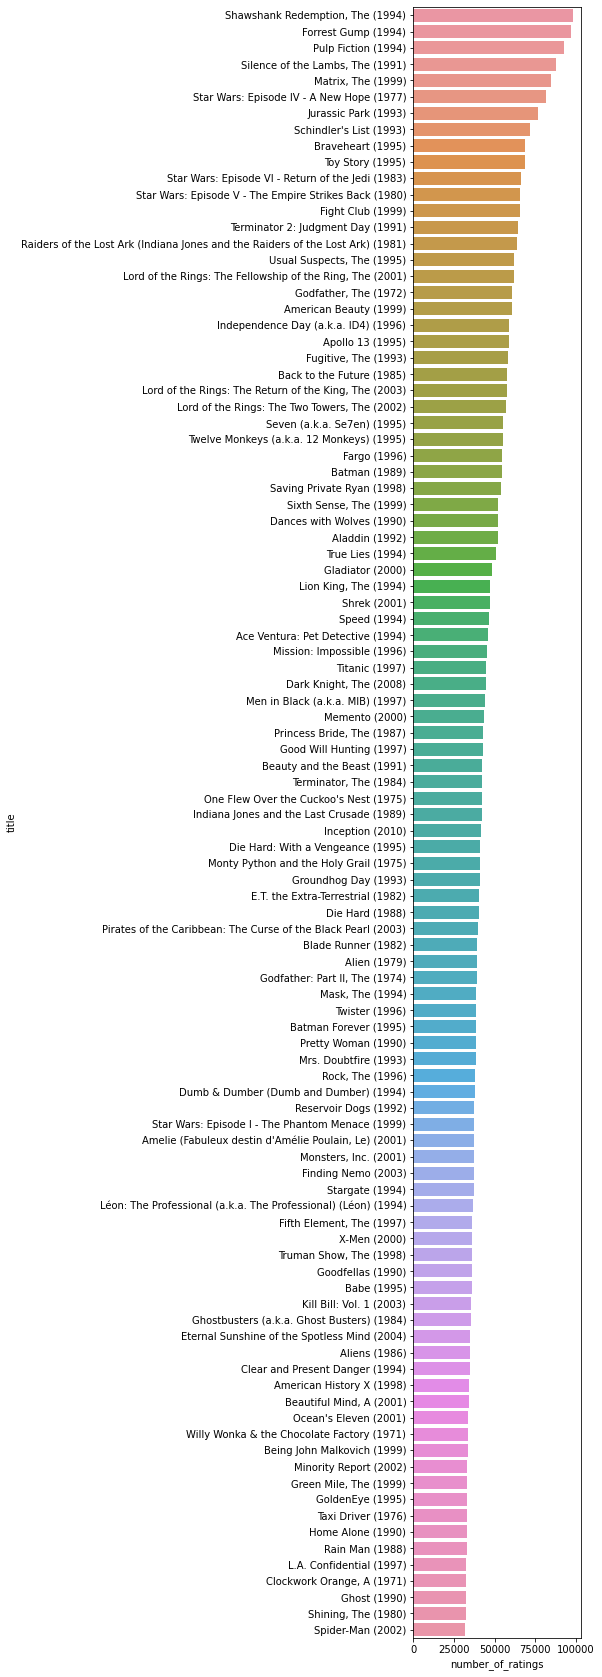

In [101]:
plt.figure(figsize=[3, 30])
sns.barplot(data=movies_with_most_ratings[:100], y='title', x='number_of_ratings');

<AxesSubplot:xlabel='movieId', ylabel='number_of_ratings'>

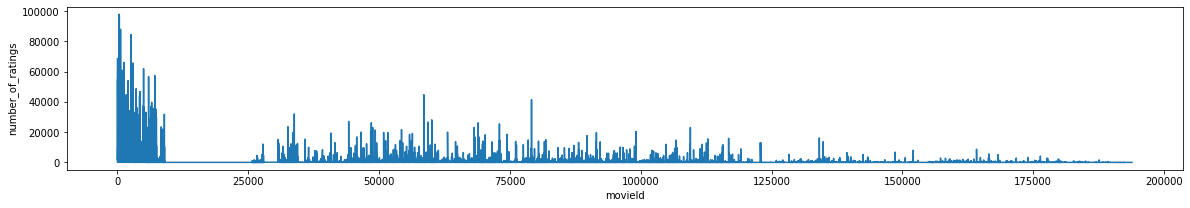

In [102]:
plt.figure(figsize=[20, 3])
sns.lineplot(data=movies_with_most_ratings, y='number_of_ratings', x='movieId');

In [177]:
movies_with_most_ratings.query('number_of_ratings > 1000')

,movieId,title,genres,number_of_ratings
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,97999
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545
...,...,...,...,...
3924,55094,In the Valley of Elah (2007),Drama|Mystery,1004
3925,8542,"Day at the Races, A (1937)",Comedy|Musical,1002
3926,3120,"Distinguished Gentleman, The (1992)",Comedy,1002
3927,2460,"Texas Chainsaw Massacre 2, The (1986)",Horror,1001


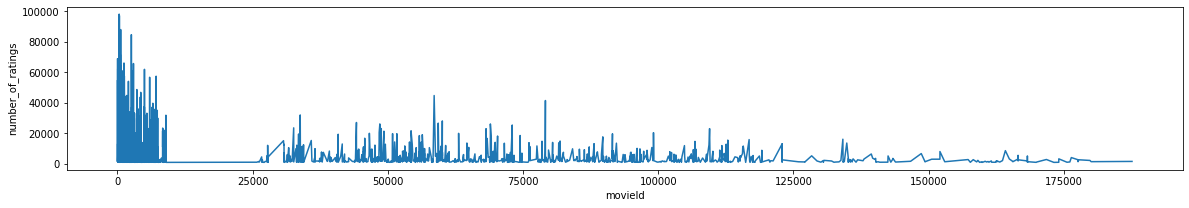

In [179]:
plt.figure(figsize=[20, 3])
sns.lineplot(data=movies_with_most_ratings.query('number_of_ratings > 1000'), y='number_of_ratings', x='movieId');

In [103]:
pd.DataFrame(movies_with_most_ratings['movieId'].describe().astype('int32')).T

,count,mean,std,min,25%,50%,75%,max
movieId,53889,109110,60910,1,66310,123105,160770,193886


## f)

In [104]:
list(movieId_with_most_ratings_series[:10].index)

[318, 356, 296, 593, 2571, 260, 480, 527, 110, 1]

In [130]:
movies_raw.set_index('movieId')

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193876,The Great Glinka (1946),(no genres listed)
193878,Les tribulations d'une caissière (2011),Comedy
193880,Her Name Was Mumu (2016),Drama


In [142]:
movieId_with_most_ratings_top10_avarage_ratings_raw = (
    ratings_raw.query(f"movieId == {list(movieId_with_most_ratings_series[:10].index)}")
    .groupby("movieId")
    .mean()["rating"]
    .reset_index()
    .sort_values("rating", ascending=False)
)

movieId_with_most_ratings_top10_avarage_ratings = (
    movieId_with_most_ratings_top10_avarage_ratings_raw.set_index("movieId")
    .join(movies_raw.set_index("movieId"))
    .reset_index()
)

movieId_with_most_ratings_top10_avarage_ratings

,movieId,rating,title,genres
0,318,4.424188,"Shawshank Redemption, The (1994)",Crime|Drama
1,527,4.257502,Schindler's List (1993),Drama|War
2,296,4.173971,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,4.151412,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,4.149695,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,4.120455,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,356,4.056585,Forrest Gump (1994),Comedy|Drama|Romance|War
7,110,4.008481,Braveheart (1995),Action|Drama|War
8,1,3.886649,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,480,3.665034,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


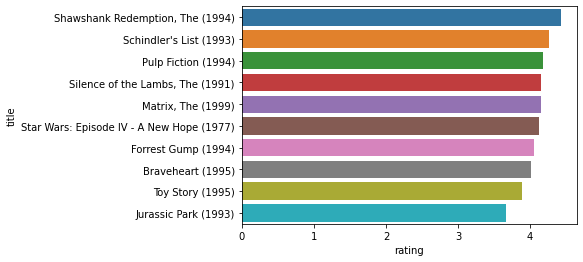

In [176]:
sns.barplot(
    data=movieId_with_most_ratings_top10_avarage_ratings,
    y="title",
    x="rating",
    order=movieId_with_most_ratings_top10_avarage_ratings.sort_values(
        "rating", ascending=False
    ).title,
);

## a)

In [171]:
movies_raw

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [175]:
movies_genre_list = movies_raw.drop('genres', axis=1).join(movies_raw['genres'].apply(lambda row: row.split('|')))
movies_genre_list

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
58093,193876,The Great Glinka (1946),[(no genres listed)]
58094,193878,Les tribulations d'une caissière (2011),[Comedy]
58095,193880,Her Name Was Mumu (2016),[Drama]
58096,193882,Flora (2017),"[Adventure, Drama, Horror, Sci-Fi]"


In [157]:
list(movies_raw['genres'].unique())[:10]

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy',
 'Action|Crime|Thriller',
 'Adventure|Children',
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Horror']